<a href="https://colab.research.google.com/github/RafsanJany-44/ACM/blob/master/ml_antimalware_Android.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

########
from google.colab import files
uploaded = files.upload()
#############


# Import The Dataset

In [3]:
# train = pd.read_csv('/kaggle/input/pe-files-malwares/dataset_malwares.csv', sep=',')
# test = pd.read_csv('/kaggle/input/pe-files-malwares/dataset_test.csv', sep=',')

####################
import pandas as pd
import io
train = pd.read_csv('/content/data-train.csv', sep=',')
test = pd.read_csv('/content/data-test.csv', sep=',')
####################


In [ ]:
train

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,android.permission.READ_SMS,com.squaremed.diabetesconnect.android.permission.C2D_MESSAGE,com.google.android.c2dm.permission.RECEIVE,.permission.C2D_MESSAGE,com.oppo.launcher.permission.READ_SETTINGS,br.com.tapps.myderp.permission.C2D_MESSAGE,com.promitor.fleek.permission.C2D_MESSAGE,com.avg.cleaner.PAYMENT_BROADCAST_PERMISSION,ca.tsn.mobile.android.permission.C2D_MESSAGE,CLASS
0,a.envisionmobile.caa.apk,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,air.G2JValentineRoseEscape2017.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,air.com.playtika.slotomania.apk,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,ak.alizandro.smartaudiobookplayer.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,au.com.tapstyle.apk,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,919a015245f045a8da7652cefac26e71808b22635c6f32...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
104,b41d8296242c6395eee9e5aa7b2c626a208a7acce979bc...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
105,d721a38e55441e3273754fa642f2744567dc786df356e8...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
106,dc99785268312135079fae8a720ec442fd02d247e22223...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
test

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,android.permission.READ_SMS,com.squaremed.diabetesconnect.android.permission.C2D_MESSAGE,com.google.android.c2dm.permission.RECEIVE,.permission.C2D_MESSAGE,com.oppo.launcher.permission.READ_SETTINGS,br.com.tapps.myderp.permission.C2D_MESSAGE,com.promitor.fleek.permission.C2D_MESSAGE,com.avg.cleaner.PAYMENT_BROADCAST_PERMISSION,ca.tsn.mobile.android.permission.C2D_MESSAGE,CLASS
0,baby.com.kidsToysReview.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ca.save.m.apk,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,com.airmiles.loadandgo.apk,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,com.redrazors.pathbuilder.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0f52bf7d7b6cf39cbe438b141372e923.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4d3de2103f740345aa2041691fde0878d7d32e9e4985ad...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,fe1df17ab903979223e5eb514ffe24f72d540ad26f9592...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
train.isnull().any().sum()

0

# Split The Train Data


In [ ]:
# #The target is Malware Column {0=Benign, 1=Malware}

X = train.drop(['NAME', 'CLASS'], axis = 1)
y = train['CLASS']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)
X_train.head()

,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,android.permission.ACCESS_FM_RADIO,...,android.permission.RECEIVE_SMS,android.permission.READ_SMS,com.squaremed.diabetesconnect.android.permission.C2D_MESSAGE,com.google.android.c2dm.permission.RECEIVE,.permission.C2D_MESSAGE,com.oppo.launcher.permission.READ_SETTINGS,br.com.tapps.myderp.permission.C2D_MESSAGE,com.promitor.fleek.permission.C2D_MESSAGE,com.avg.cleaner.PAYMENT_BROADCAST_PERMISSION,ca.tsn.mobile.android.permission.C2D_MESSAGE
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
X_new = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
X_new.head()

,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,android.permission.ACCESS_FM_RADIO,...,android.permission.RECEIVE_SMS,android.permission.READ_SMS,com.squaremed.diabetesconnect.android.permission.C2D_MESSAGE,com.google.android.c2dm.permission.RECEIVE,.permission.C2D_MESSAGE,com.oppo.launcher.permission.READ_SETTINGS,br.com.tapps.myderp.permission.C2D_MESSAGE,com.promitor.fleek.permission.C2D_MESSAGE,com.avg.cleaner.PAYMENT_BROADCAST_PERMISSION,ca.tsn.mobile.android.permission.C2D_MESSAGE
0,0.0,0.0,0.0,0.0,0.0,-0.154303,0.0,0.0,0.0,0.0,...,-0.604218,-0.604218,-0.108465,-0.769800,0.0,-0.108465,-0.108465,-0.108465,-0.108465,-0.108465
1,0.0,0.0,0.0,0.0,0.0,-0.154303,0.0,0.0,0.0,0.0,...,1.655032,1.655032,-0.108465,1.299038,0.0,-0.108465,-0.108465,-0.108465,-0.108465,-0.108465
2,0.0,0.0,0.0,0.0,0.0,-0.154303,0.0,0.0,0.0,0.0,...,-0.604218,-0.604218,-0.108465,-0.769800,0.0,-0.108465,-0.108465,-0.108465,-0.108465,-0.108465
3,0.0,0.0,0.0,0.0,0.0,-0.154303,0.0,0.0,0.0,0.0,...,-0.604218,-0.604218,-0.108465,-0.769800,0.0,-0.108465,-0.108465,-0.108465,-0.108465,-0.108465
4,0.0,0.0,0.0,0.0,0.0,-0.154303,0.0,0.0,0.0,0.0,...,-0.604218,-0.604218,-0.108465,-0.769800,0.0,-0.108465,-0.108465,-0.108465,-0.108465,-0.108465


In [ ]:
# Principal Component Analysis

skpca = PCA(n_components = 40)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.9497660749679533


In [ ]:
# Build The Model
model = RandomForestClassifier(n_estimators = 100, random_state = 0, oob_score = True, max_depth = 16, max_features = 'sqrt')
model.fit(X_pca, y_train)

RandomForestClassifier(max_depth=16, max_features='sqrt', oob_score=True,
                       random_state=0)

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_new_test = pd.DataFrame(X_test_scaled, columns = X.columns)
X_test_pca = skpca.transform(X_new_test)

In [ ]:
# Predict

y_pred = model.predict(X_test_pca)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.89      0.94         9

    accuracy                           0.95        22
   macro avg       0.96      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



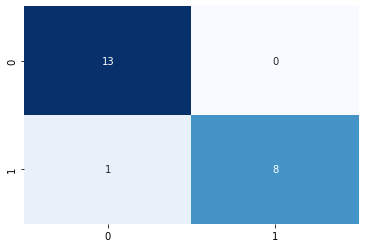

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'd', cmap = plt.cm.Blues, cbar = False)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import *
pipe = Pipeline([('scale', scaler),('pca', skpca),('clf', model)])

In [ ]:
X_testing = test.drop('NAME', axis = 1)

X_testing_scaled = pipe.named_steps['scale'].transform(X_testing)
X_testing_pca = pipe.named_steps['pca'].transform(X_testing_scaled)
y_testing_pred = pipe.named_steps['clf'].predict_proba(X_testing_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CLASS
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
pd.concat([test['NAME'], pd.DataFrame(y_testing_pred)], axis = 1)